<h1>Common Ground</h1>
Much of the treatment of random variables (RV) makes a distinction between **discrete** and **continous** random variables. For example, discrete RVs are associated with a probability **mass** function (PMF) that is a function from a discrete value, i.e. a possible outcome, and the probability that the RV takes that outcome. Continuous RVs are associated with a probability **density** function (PDF) that is a function from any value on the real line to the probability **density** of the RV at that value (thought of as the density per unit length). 

The **cumulative distribution function** (CDF) is a single concept that applies to all RVs. The CDF of a RV *X*, denoted $F_X\hspace{1pt}$ defines the probability $P\left(X\le x\right)\hspace{1pt}$

$$F_X\left(x\right) = P\left(X\le x\right) =  \left\{ \begin{eqnarray} \sum_{k\le x} p_X\left(k\right) &,& \quad \mbox{if}\hspace{3pt} X \hspace{2pt} \mbox{is discrete} \cr
\int_{-\infty}^x f_X\left(t\right)dt&,& \quad \mbox{if}\hspace{3pt} X \hspace{2pt} \mbox{is continuous} \end{eqnarray}\right.$$

<h2>Properties of the CDF</h2>

If *X* is discrete and takes integer values, the PMF and the CDF can be obtained as

$$F_X\left(k\right) = \sum_{i=-\infty}^k p_X\left(i\right)$$

$$p_X\left(k\right) = P\left(X\le k\right) - P\left(X \le k-1\right) = F_X\left(k\right) - F_X\left(k-1\right)$$

for all integers *k*.

If *X* is a continuous RV, the PDF and CDF can be obtained as

$$F_X\left(x\right) = \int_{-\infty}^x f_X\left(t\right)dt$$

$$f_X\left(x\right) = \frac{dF_X}{dx}\left(x\right)$$

<h3>Example: PMF/PDF For Maximum of Several Random Variables</h3>

Consider the set of random variables $\mathbf{X}=\left\{X_1,\ldots,X_N\hspace{1pt}\right\}$ where the random variables in **X** *are independent*. Let *Z* be the random variable equal to the maximum value over the set **X** for a given observation of **X**. We can obtain the PMF or PDF of **Z** by first considering the CDF

$$\begin{eqnarray}F_Z\left(z\right) &=& P\left(X_1\le z\right)\ldots P\left(X_N \le z\right) \cr
&=& F_{X_1}\left(z\right)\ldots F_{X_N}\left(z\right)\end{eqnarray}$$

By the properties of the CDF, the PMF or PDF can be obtained. 

Consider the case where **X** consists of two *independent Normal random variables* with means $\mu_i = 0, 3\hspace{2pt}$ respectively and variances $\sigma^2 = 1, 16\hspace{2pt}$ respectively and let **Z** be the maximum of **X**. 

Recall that for an arbitrary *Gaussian* random variable *X* with mean $\mu\hspace{1pt}$ and standard deviation $\sigma\hspace{1pt}$ we have

$$F_X\left(x\right) = \Phi \left(\frac{x-\mu}{\sigma}\right)$$

where 

$$\Phi\left(x\right) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-t^2/2}dt$$

is the CDF of the *standard Normal*, that is a Gausian RV with zero mean and unit variance. Thus CDF of Z is

$$F_Z\left(z\right) = \Phi\left(z\right) \cdot \Phi\left(\frac{z-3}{4}\right)$$

Now we can obtain the PDF of **Z** by applying the [Fundamental Thoerem of Calculus](http://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus) and the [chain rule](http://en.wikipedia.org/wiki/Chain_rule) to obtain

$$\begin{eqnarray}f_Z\left(z\right) &=& \Phi\left(z\right) \cdot \frac{d}{dz}\Phi\left(\frac{z-3}{4}\right) + \Phi\left(\frac{z-3}{4}\right) \cdot \frac{d}{dz}\Phi\left(z\right) \cr
&=& \Phi\left(z\right)\cdot \frac{1}{4}\cdot f_Z\left(\frac{z-3}{4}\right) +\Phi\left(\frac{z-3}{4}\right)\cdot f_Z\left(z\right) 
\end{eqnarray}$$

where

$$f_Z\left(z\right) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}$$

Below we attempt to confirm (technically we are only "not contradicting") this result via simulation. We will take *N* observations of **Z** for some *large N* and determine if the observed distribution *closely matched* the predicted one. 

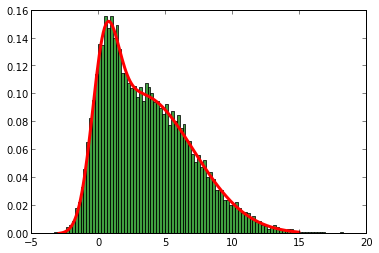

In [32]:
import scipy.stats
numSamples = 20000

def fZ(z):
    rv = scipy.stats.norm(loc=0, scale=1) #standard normal
    z1 = (z-3)/(4.0)
    return rv.cdf(z)*rv.pdf(z1)/(4.0) + rv.cdf(z1)*rv.pdf(z)

raynge = [(-3 + i/10.0) for i in range(180)]
predicted = [fZ(z) for z in raynge]
n1 = scipy.stats.norm(loc=0, scale=1)
n2 = scipy.stats.norm(loc=3, scale =4)

X1 = n1.rvs(size=numSamples)
X2 = n2.rvs(size=numSamples)
Z = [max(X1[i],X2[i]) for i in range(numSamples)]

fig = pyplot.figure()
ax = fig.add_subplot(111)

n, bins, patches = ax.hist(Z, 100, normed=1, facecolor='green', alpha=0.75)
ax.plot(raynge,predicted,'r', linewidth=3)
    